In [1]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [5]:
### Global Variables
y = []
err = []
fileRE = '../experiments/Exp1-aws-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#*.csv'
# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 11 + 20 + 15 + 8
postChar = 4

In [6]:
### Main Execution

# Core
# for file_name in getListOfFiles(fileRE,preChar,postChar):
#     row = np.asarray(getFirstRowOfCsv(file_name))
    
#     print(file_name, row)

#     y.append(getAve(row))
#     err.append(np.std(row.astype(np.float)))
    
# Sep [files,cols]
rows = np.empty([16,30])
# print(rows)
for row_id,file_name in enumerate(getListOfFiles(fileRE,preChar,postChar)):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)
    rows[row_id] = row

#     y.append(getAve(row))
#     err.append(np.std(row.astype(np.float)))

# print(rows)
rows_t = np.transpose(rows)
# print(rows_t)

for r in rows_t:
    y.append(getAve(r))
    err.append(np.std(r.astype(np.float)))

# print(y)
# print(err)

../experiments/Exp1-aws-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#1.csv ['509' '736' '1046' '1356' '1600' '1858' '2103' '2518' '2713' '3168' '3515'
 '3635' '3973' '4182' '4558' '4839' '5090' '5564' '5859' '6285' '6414'
 '6823' '7175' '7524' '7774' '7933' '8162' '8691' '9106' '9682']
../experiments/Exp1-aws-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#2.csv ['486' '631' '938' '1243' '1569' '2024' '2161' '2445' '2811' '3601' '3631'
 '4018' '3955' '4526' '4884' '5017' '5335' '5783' '5952' '7069' '6793'
 '7158' '7312' '7892' '8111' '8320' '8608' '9056' '9731' '9635']
../experiments/Exp1-aws-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#3.csv ['444' '758' '1061' '1418' '1838' '2058' '2273' '2552' '2842' '3095' '3735'
 '3747' '4210' '4640' '4851' '5402' '6092' '5713' '6238' '6649' '6860'
 '7587' '7527' '8121' '8636' '8774' '10424' '10356' '9431' '10708']
../experiments/Exp1-aws-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#4.csv ['468' '694' '1011

[  417.375    675.75    1026.4375  1241.125   1605.8125  1863.25    2128.0625
  2507.8125  2875.5     3224.9375  3525.375   3677.25    4055.9375  4484.
  4849.1875  5216.6875  5436.      5643.3125  6172.3125  6439.375   6796.875
  7144.5     7468.0625  7991.625   8229.875   8432.5     8907.      9082.125
  9351.625   9932.8125]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300]
[100.98630785903602, 65.413588037960437, 292.54550260386844, 177.44677899302653, 288.47946606951075, 249.23344980158663, 267.4414582553535, 313.4858885879076, 384.15101197315619, 317.27343663431708, 376.12030572012463, 378.59188118606028, 379.79541676243275, 410.68281556451814, 460.16902040853427, 835.78621060875969, 481.78872444257138, 476.48999448440679, 648.2593731244848, 475.57332176542451, 634.01359163270308, 775.31638703177168, 390.87137730172827, 491.78436267839993, 633.5836443398772, 493.67727312486244, 785.72251781401815, 878.671929

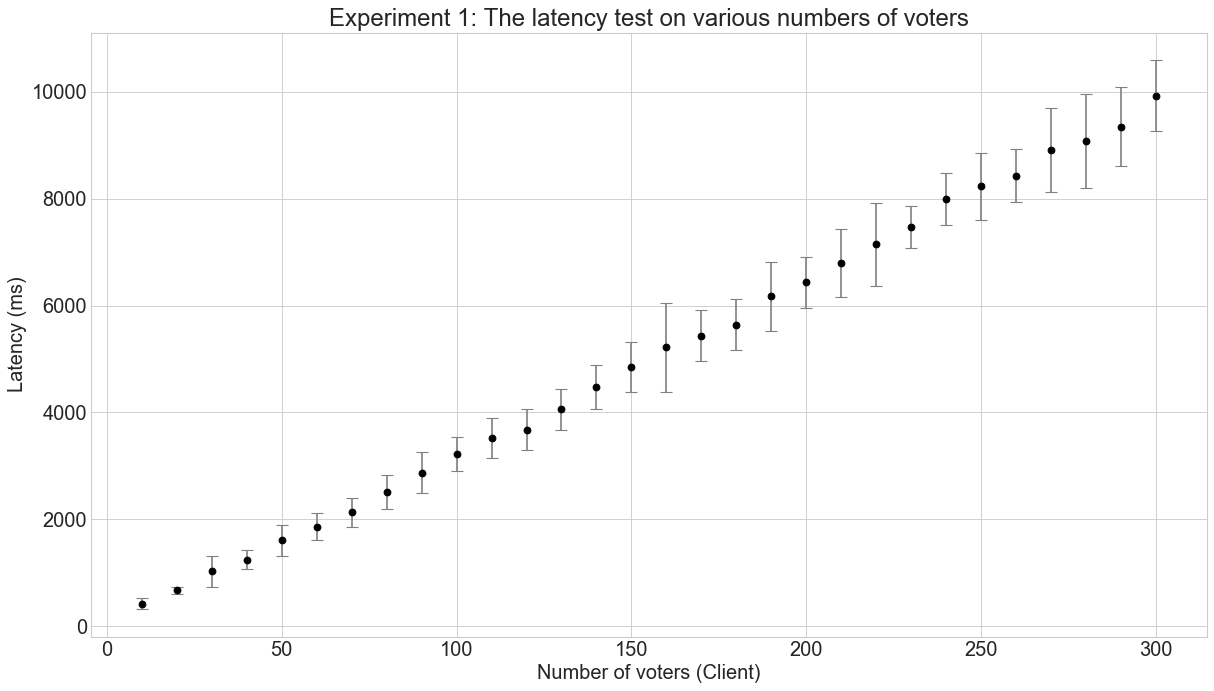

In [10]:
x = np.arange(10,301,10)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
# plt.xticks(np.arange(0, 21, step=1))
# plt.yticks(np.arange(0, 70000, step=10000))
# plt.xlabel("Number of consensuses (Custodian)")
# plt.xlabel("Participation threshold (%)")
plt.xlabel("Number of voters (Client)")
plt.ylabel("Latency (ms)")
plt.title("Experiment 1: The latency test on various numbers of voters")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");